# Dataset 1: Synthetic Circle


## Introduction


## Exploratory Data Analysis (EDA)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("circles.txt")

### Reading and Data Preprocessing

In this section, we will take a look at the structure of the data.


In [10]:
df.head()

,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


In [14]:
df.tail()

,x,y,class
9995,-4.85337,138.79801,7
9996,135.75636,77.35585,74
9997,81.18879,184.85662,49
9998,116.47674,116.45223,66
9999,120.84808,75.07245,64


In [47]:
df.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


In [17]:
df.shape

(10000, 3)

In [24]:
df.isnull().sum()

x        0
y        0
class    0
dtype: int64

In [26]:
df.dtypes

x        float64
y        float64
class      int64
dtype: object

In [30]:
df.duplicated().sum()

0

So upon looking at the data, we see that there are no missing values, and all values are of the float type. Additionally, there are no duplicates in the dataset. We will now move on to the next section - Exploratory Data Analysis (EDA).

### Data Visualization

In this section, we aim to visually explore the data.

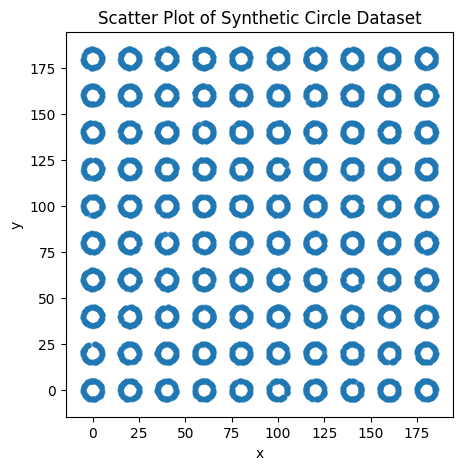

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(df["x"], df["y"], s = 10, alpha = 0.5)
plt.title("Scatter Plot of Synthetic Circle Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

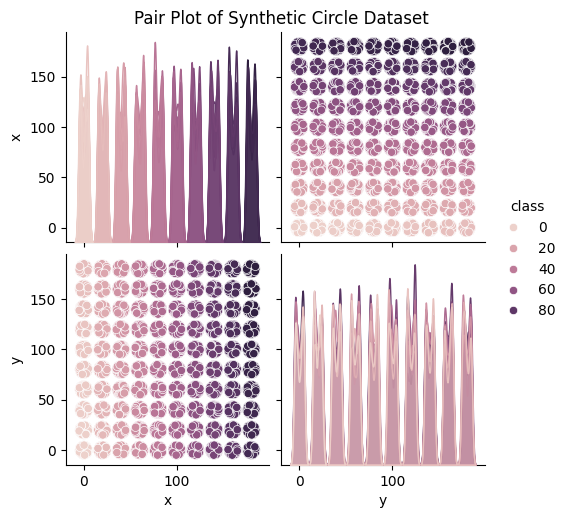

In [71]:
pairplot = sns.pairplot(df, hue='class')
pairplot.fig.suptitle("Pair Plot of Synthetic Circle Dataset", y=1.02)
plt.show()

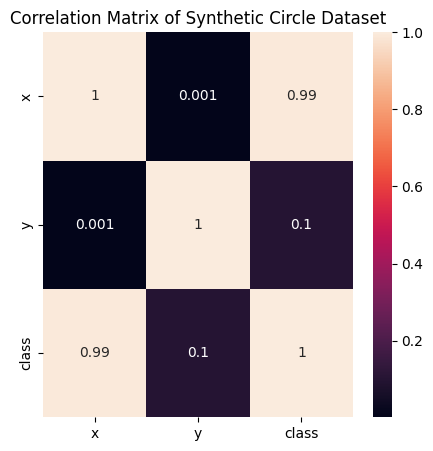

In [73]:
number_df = df.select_dtypes(include = [np.number])
correlation_matrix = number_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix of Synthetic Circle Dataset")
plt.show()

Result of EDA blah blah

## Clustering Methods

### K-Means Implementation

Algorithm description.....

In [37]:
import numpy as np
import random

class KMeansClustering:
    def __init__(self, k, epsilon = 1e-9, max_iter = 2000):
        self.k = k
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.centroids = []
        self.clusters = []

    def cluster_points(self, points):
        """ 
        Measure distance to each centroid and assign points to the nearest cluster 
        """
        self.clusters = []
        for i in range(self.k):
            self.clusters.append([])
        for point in points:
            pt_distances = [np.linalg.norm(point - self.centroids[i], axis=0) for i in range(self.k)]
            closest_cluster_index = int(np.argmin(pt_distances))
            self.clusters[closest_cluster_index].append(point)

    def recalculate_centroid(self):
        """
        recalculate centroid to be the mean of all of its cluster's points
        """
        for i in range(self.k):
            if len(self.clusters[i]) > 0:
                self.centroids[i] = np.mean(self.clusters[i], axis=0)
            else:
                self.centroids[i] = self.centroids[i]

    def convergence(self, old_centroids):
        """
        Checks convergence
        """
        all_distances = np.linalg.norm(np.array(old_centroids) - np.array(self.centroids), axis=1)
        max_dist = all_distances.max()
        return max_dist < self.epsilon

    def fit(self, points):
        """
        training k-means model
        """
        points = np.array(points)
        self.centroids = random.sample(list(points), self.k)
        for i in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self.cluster_points(points)
            self.recalculate_centroid()
            if self.convergence(old_centroids):
                print(f"Converged at {i+1} iteration")
                break
        return self.clusters


In [66]:
X = df[["x", "y"]].to_numpy()

kmeans = KMeansClustering(k=100, epsilon = 1e-4, max_iter = 500)
clusters = kmeans.fit(X)

Converged at 15 iteration


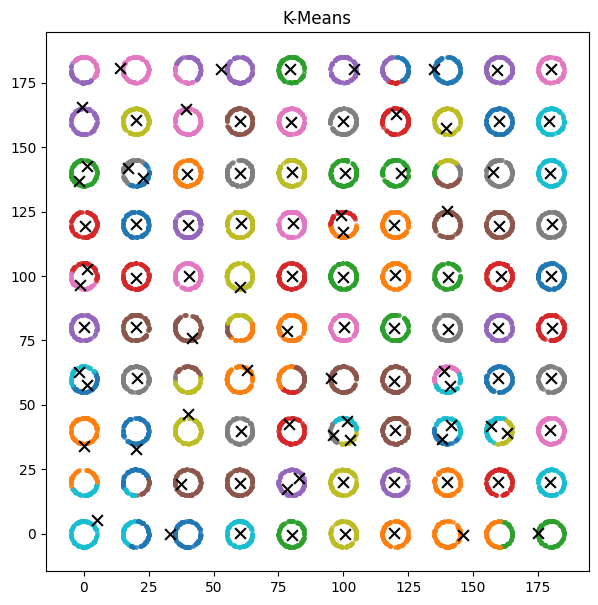

In [68]:
plt.figure(figsize = (7, 7))
for cluster in clusters:
    cluster = np.array(cluster)
    if len(cluster):
        plt.scatter(cluster[:,0], cluster[:,-1], s =6, alpha = 0.7)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=60, marker='x')
plt.title('K-Means')
plt.show()

Now that we have our clustering, let us evaluate this with Davies–Bouldin Index.

In [71]:
centroids = np.array(kmeans.centroids)

def assign_labels_from_centroids(X, centroids):
    d = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (n,k)
    return np.argmin(d, axis=1)

labels = assign_labels_from_centroids(X, centroids)


In [73]:
def davies_bouldin_index(X, labels, centroids, eps=1e-12):
    K = len(centroids)
    S = np.zeros(K, dtype=float)
    for k in range(K):
        pts = X[labels == k]
        if len(pts) == 0:
            S[k] = 0.0
        else:
            S[k] = np.mean(np.linalg.norm(pts - centroids[k], axis=1))

    # centroid distances M_{ij}
    M = np.linalg.norm(centroids[:, None, :] - centroids[None, :, :], axis=2) + eps

    # R_{ij} = (S_i + S_j) / M_{ij}; for i!=j
    R = (S[:, None] + S[None, :]) / M
    np.fill_diagonal(R, -np.inf)  # ignore i=j

    # D_i = max_j R_{ij}; DBI = mean_i D_i
    D = np.max(R, axis=1)
    return float(np.mean(D))


In [75]:
dbi = davies_bouldin_index(X, labels, centroids)
print("Davies–Bouldin Index:", round(dbi, 6))

Davies–Bouldin Index: 0.682591
